In [33]:
import numpy as np
import matplotlib.pylab as plt
from scipy.ndimage.morphology import binary_dilation, binary_erosion, binary_opening, binary_closing, binary_fill_holes,generate_binary_structure


[[ 0.125  0.125  0.125]
 [ 0.125 -1.     0.125]
 [ 0.125  0.125  0.125]]


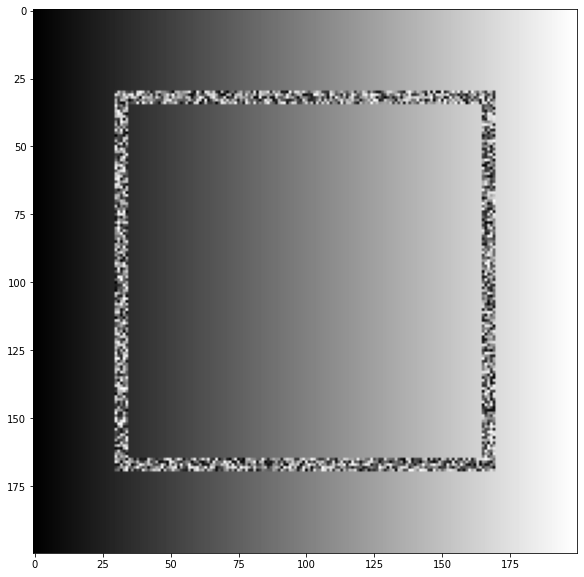

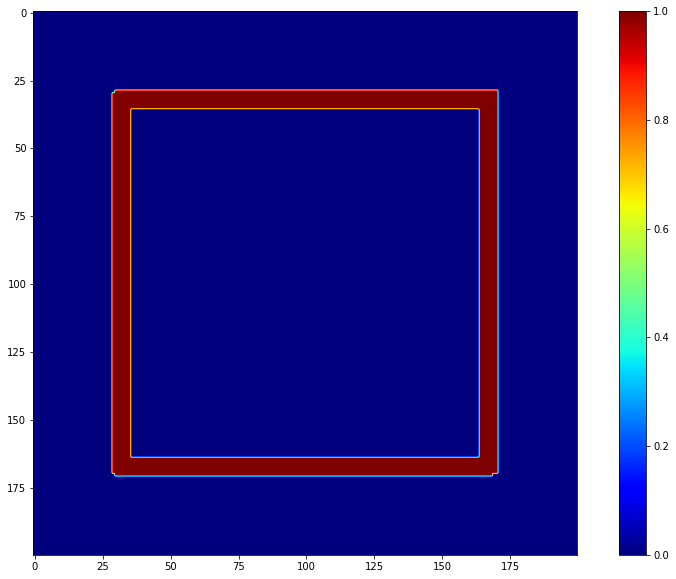

In [34]:
def apply_conv3x3(kernel, img):
    ### Your Code ###
    img_padding =np.pad(img, 1, "wrap")
    out = np.zeros_like(img)
    kernel = np.rot90(kernel,2,axes=(0,1))
    x_axe , y_axe = img.shape
    
    for i in range (1,x_axe+1):
        for j in range (1,y_axe+1):
            faltung = img_padding[ i -1 : i +2 , j -1: j +2]
            res = np.zeros_like(faltung)
            for e in range(faltung.shape[0]):
                for k in range(kernel.shape[0]):
                        res[e][k] = faltung[e][k] * kernel[e][k]
            out[i-1,j-1] =np.sum(res)
    return out


n = 200
x = np.linspace(0, 1, n)
xv, yv = np.meshgrid(x, x)

img = xv.copy()
width = 5
img[30:n-30,30:n-30] = np.random.rand(n-60,n-60)
img[30+width:n-30-width,30+width:n-30-width] = xv[30+width:n-30-width,30+width:n-30-width]

kernel = np.ones((3,3))/8
kernel[1,1] = -1
print(kernel)

edgeDetector =np.abs(apply_conv3x3(kernel,img))>0.04


se = np.ones((15,15), dtype=bool)
segmentationMap = binary_closing(edgeDetector,se)
se = np.ones((4,4), dtype=bool)
segmentationMap = binary_opening(segmentationMap,se)


fig = plt.figure(figsize=(15,10))
plt.imshow(img, cmap='gray')
plt.show()

fig = plt.figure(figsize=(15,10))
plt.imshow(segmentationMap, cmap='jet')
plt.colorbar()
plt.show()